# Student Performance Analysis

Bu projede öğrencilerin demografik, akademik ve sosyal özellikleri kullanılarak
final notlarının tahmin edilmesi amaçlandı.


## 1. Giriş

Bu bölümde çalışmanın amacı, veri seti  ve genel kapsamı sunulmaktadır.


## 1.1
Bu bölümde analizde kullanılacak veri seti Python ortamına aktarılmış
ve veri setinin ilk birkaç gözlemi incelenmiştir.


In [1]:
import pandas as pd

df = pd.read_csv("data/student_data.csv")

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Exploratory Data Analysis (EDA)

Bu bölümde veri setinin genel yapısı, hedef değişkenin dağılımı ve
değişkenler arası ilişkiler incelenmiştir.

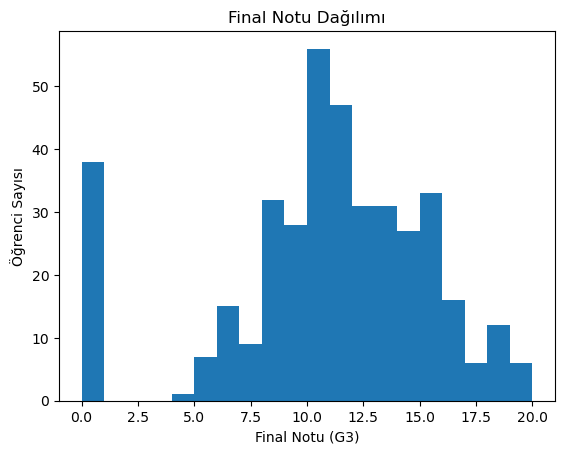

In [2]:
import matplotlib.pyplot as plt

plt.hist(df["G3"], bins=20)
plt.xlabel("Final Notu (G3)")
plt.ylabel("Öğrenci Sayısı")
plt.title("Final Notu Dağılımı")
plt.show()


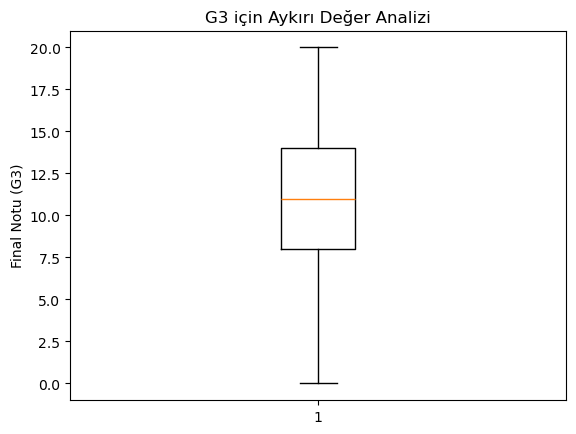

In [3]:
plt.boxplot(df["G3"])
plt.ylabel("Final Notu (G3)")
plt.title("G3 için Aykırı Değer Analizi")
plt.show()


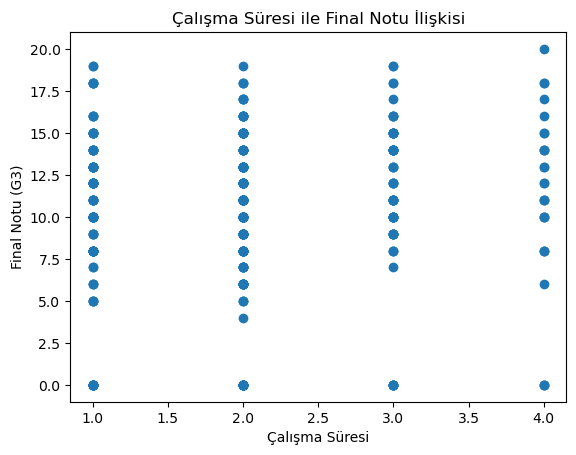

In [4]:
plt.scatter(df["studytime"], df["G3"])
plt.xlabel("Çalışma Süresi")
plt.ylabel("Final Notu (G3)")
plt.title("Çalışma Süresi ile Final Notu İlişkisi")
plt.show()


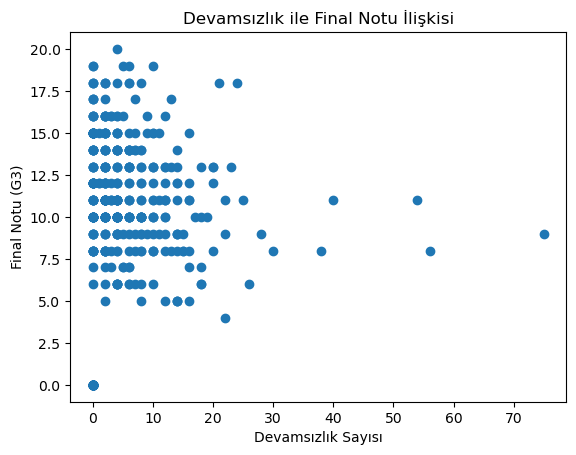

In [5]:
plt.scatter(df["absences"], df["G3"])
plt.xlabel("Devamsızlık Sayısı")
plt.ylabel("Final Notu (G3)")
plt.title("Devamsızlık ile Final Notu İlişkisi")
plt.show()


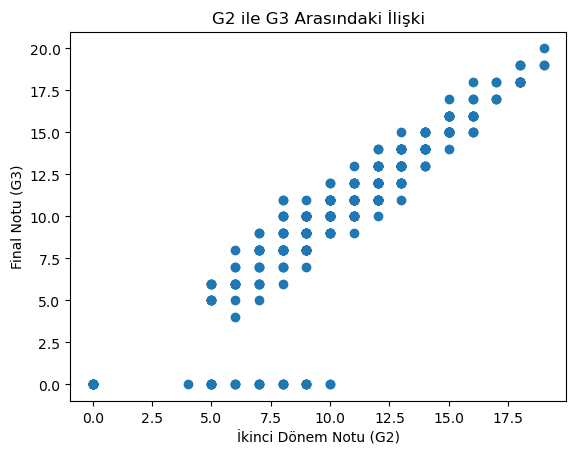

In [6]:
plt.scatter(df["G2"], df["G3"])
plt.xlabel("İkinci Dönem Notu (G2)")
plt.ylabel("Final Notu (G3)")
plt.title("G2 ile G3 Arasındaki İlişki")
plt.show()


In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## 3. Data Preprocessing

Modelleme öncesinde veriler temizlenmiş, kategorik değişkenler sayısal
forma dönüştürülmüş ve veri seti eğitim-test olarak ayrılmıştır.


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [9]:
X = df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Modeling

Bu bölümde Lineer Regresyon ve Random Forest modelleri kullanılarak
öğrencilerin final notları tahmin edilmiştir.


In [12]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred_lr = lr_model.predict(X_test_scaled)


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred_rf = rf_model.predict(X_test)


## 5. Evaluation

Kurulan modellerin performansları MAE, RMSE ve R² metrikleri kullanılarak
değerlendirilmiştir.


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


(1.6466656197147496, np.float64(2.3783697847961363), 0.7241341236974023)

In [17]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(1.1645569620253164, np.float64(1.9487730641858232), 0.8147911386865877)

In [18]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2": [r2_lr, r2_rf]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,1.646666,2.378370,0.724134
1,Random Forest,1.164557,1.948773,0.814791


## 6. Conclusion

Elde edilen sonuçlar özetlenmiş, modellerin başarısı ve geliştirilebilecek
yönler tartışılmıştır.
